# PA2 of CSE 251B, WI 21

## (a) Load training and testing data then create a validation split from the training data.

In [1]:
from neuralnet import *
import numpy as np

# Load the configuration.
config = load_config("./")

# Create the model
model  = Neuralnetwork(config)

 # Load the data
x_train, y_train = load_data(path="./", mode="train")
x_test, y_test = load_data(path="./", mode="t10k")

x_train = normalize_data(x_train)
# Y_train = one_hot_encoding(labels=Y_train)
x_test = normalize_data(x_test)
# y_test = one_hot_encoding(labels=y_test)

# Create splits for validation data here.
x_train, y_train, x_valid, y_valid = data_spliter(x_train, y_train, percentage=0.1)

## Part (b) Estimation of bias weight and weight

In [6]:
from neuralnet import *
from random import shuffle
import numpy as np

# Functions
def check_d_b(model, layer, eps, output_idx):
    layer.b[0][output_idx] += eps # w+eps
    loss_1 = model.forward(np.array(xtrain), np.array(ytrain))[1]
    layer.b[0][output_idx] -= 2*eps # w-eps
    loss_2 = model.forward(np.array(xtrain), np.array(ytrain))[1]
    d_b_get = (loss_1 - loss_2) / (2 * eps) # Numerical estimation
    layer.b[0][output_idx] += eps # back to original para
    return d_b_get

def check_d_w(model, layer, eps, input_idx, output_idx):
    layer.w[input_idx][output_idx] += eps # w+eps
    loss_1 = model.forward(np.array(xtrain), np.array(ytrain))[1]
    layer.w[input_idx][output_idx] -= 2*eps # w-eps
    loss_2 = model.forward(np.array(xtrain), np.array(ytrain))[1]
    d_w_get = (loss_1 - loss_2) / (2 * eps) # Numerical estimation
    layer.w[input_idx][output_idx] += eps # back to original para
    return d_w_get

# para
eps = 0.01

# Data loading and spliting
x_b, y_b = load_data(path="./", mode="train")

class_num = list(range(10))
xtrain, ytrain = [], []
for idx in range(y_b.shape[0]):
    if len(class_num) == 0:
        break
    if np.argmax(y_b[idx]) in class_num:
        xtrain.append(x_b[idx])
        ytrain.append(y_b[idx])
        class_num.remove(np.argmax(y_b[idx]))
        
# Load model para
config_b= yaml.load(open('./partb.yaml', 'r'), Loader=yaml.SafeLoader)

model = Neuralnetwork(config_b)
model.forward(np.array(xtrain), np.array(ytrain))
model.backward()

# Calaulation
d_b, d_b_estimate, d_w, d_w_estimate = [], [], [], []
for layer in model.layers:
    if isinstance(layer, Layer):
        d_b_estimate.append(check_d_b(model=model, layer=layer, eps=eps, output_idx=1))
        d_w_estimate.append([check_d_w(model=model, layer=layer, eps=eps, input_idx=0, output_idx=1), check_d_w(model=model, layer=layer, eps = eps, input_idx=0, output_idx=2)])
        d_b.append(layer.d_b[1] * 10) # multiply by the scaling factor
        d_w.append([np.multiply(layer.d_w[0][1], 10) ,np.multiply(layer.d_w[0][2], 10)]) # multiply by the scaling factor
print('Real b: {}'.format(d_b))
print('Estimate b: {}'.format(d_b_estimate))
print('Real w: {}'.format(d_w))
print('Estimate w: {}'.format( d_w_estimate))
        






Real b: [0.0947910547957617, 0.13280277310665525, 0.2829988269880445]
Estimate b: [0.0947903741035816, 0.13279972873103674, 0.2829986440210597]
Real w: [[-0.07680517789998755, 0.015319507447675743], [-0.13117408499853775, 0.005687043423169844], [0.26639110994547144, -0.09570147055050932]]
Estimate w: [[-0.07680481582612586, 0.01532012360456747], [-0.13117096720440813, 0.005686759664325081], [0.26639090431119783, -0.0957014082263008]]


## (c) Cross Validation

In [ ]:
# load model para
config_c = yaml.load(open('./partc.yaml', 'r'), Loader=yaml.SafeLoader)

# Train the model with cross validation
max_test_accu = 0

model_c = Neuralnetwork(config_c)
recording = train(model_c, x_train, y_train, x_valid, y_valid, config_c)

# Recall parameters with minimum validation loss
model_c.load_para()
test_accuracy = test(model_c, x_test, y_test)
max_test_accu = max(max_test_accu, test_accuracy)
        
print('max test accuracy: {:.4f}'.format(max_test_accu))

## (c) training and validation accuracy / loss vs number of training epochs

In [ ]:
# Plots
plt.figure(1)
plt.plot(recording['epoches'], recording['train_loss'], label='train')
plt.plot(recording['epoches'], recording['valid_loss'], label='validation')
plt.xlabel('Epoches')
plt.ylabel('Loss')
plt.title('Training and validation loss vs number of training epochs')
plt.legend()
plt.show()

plt.figure(2)
plt.plot(recording['epoches'], recording['train_accuracy'], label='train')
plt.plot(recording['epoches'], recording['valid_accuracy'], label='validation')
plt.xlabel('Epoches')
plt.ylabel('Accuracy')
plt.title('Training and validation accuracy vs number of training epochs')
plt.legend()
plt.show()

## Part (f) Experiment with Network Topology

### (i) Different number of hidden layer

[784, 50, 100, 10]
Epoch 5, Time 9.507476806640625 seconds
Train_loss = 3.1066, Valid_loss = 3.2194, Valid_accuracy = 0.5271
Epoch 10, Time 19.5297634601593 seconds
Train_loss = 2.2627, Valid_loss = 2.5239, Valid_accuracy = 0.5856
Epoch 15, Time 29.07625460624695 seconds
Train_loss = 1.9124, Valid_loss = 2.2326, Valid_accuracy = 0.6105
Epoch 20, Time 38.724907875061035 seconds
Train_loss = 1.6961, Valid_loss = 2.0503, Valid_accuracy = 0.6228
Epoch 25, Time 48.32432508468628 seconds
Train_loss = 1.5448, Valid_loss = 1.9173, Valid_accuracy = 0.6304
Epoch 30, Time 57.9082088470459 seconds
Train_loss = 1.4305, Valid_loss = 1.8156, Valid_accuracy = 0.6368
Epoch 35, Time 67.46970963478088 seconds
Train_loss = 1.3399, Valid_loss = 1.7346, Valid_accuracy = 0.6423
Epoch 40, Time 77.32644581794739 seconds
Train_loss = 1.2641, Valid_loss = 1.6682, Valid_accuracy = 0.6470
Epoch 45, Time 87.39463329315186 seconds
Train_loss = 1.2010, Valid_loss = 1.6093, Valid_accuracy = 0.6504
Epoch 50, Time 97.31

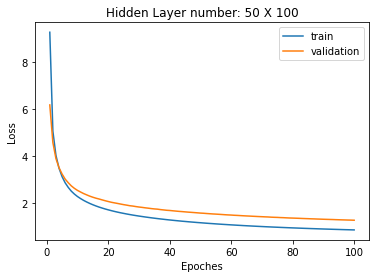

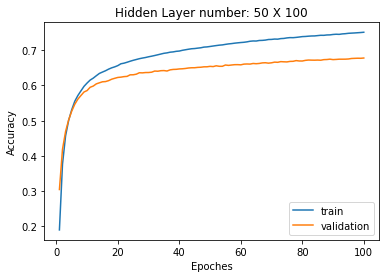

[784, 100, 50, 10]
Epoch 5, Time 11.960922241210938 seconds
Train_loss = 2.7779, Valid_loss = 2.7385, Valid_accuracy = 0.4783
Epoch 10, Time 23.148629665374756 seconds
Train_loss = 1.9567, Valid_loss = 2.0591, Valid_accuracy = 0.5526
Epoch 15, Time 34.53998112678528 seconds
Train_loss = 1.6192, Valid_loss = 1.7702, Valid_accuracy = 0.5843
Epoch 20, Time 46.33550310134888 seconds
Train_loss = 1.4201, Valid_loss = 1.5946, Valid_accuracy = 0.6041
Epoch 25, Time 57.39401841163635 seconds
Train_loss = 1.2815, Valid_loss = 1.4672, Valid_accuracy = 0.6172
Epoch 30, Time 68.725506067276 seconds
Train_loss = 1.1792, Valid_loss = 1.3714, Valid_accuracy = 0.6308
Epoch 35, Time 80.11609482765198 seconds
Train_loss = 1.0994, Valid_loss = 1.2963, Valid_accuracy = 0.6362
Epoch 40, Time 91.2380120754242 seconds
Train_loss = 1.0359, Valid_loss = 1.2348, Valid_accuracy = 0.6436
Epoch 45, Time 102.29179430007935 seconds
Train_loss = 0.9842, Valid_loss = 1.1836, Valid_accuracy = 0.6483
Epoch 50, Time 113.

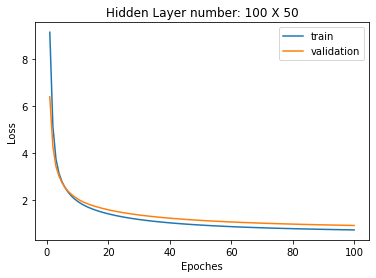

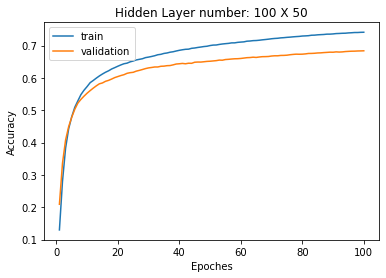

[784, 25, 50, 10]
Epoch 5, Time 5.464303731918335 seconds
Train_loss = 2.3761, Valid_loss = 2.3017, Valid_accuracy = 0.4813
Epoch 10, Time 10.971598386764526 seconds
Train_loss = 1.7293, Valid_loss = 1.7595, Valid_accuracy = 0.5447
Epoch 15, Time 16.45299005508423 seconds
Train_loss = 1.4792, Valid_loss = 1.5274, Valid_accuracy = 0.5829
Epoch 20, Time 22.47696328163147 seconds
Train_loss = 1.3377, Valid_loss = 1.3987, Valid_accuracy = 0.6027
Epoch 25, Time 27.940413236618042 seconds
Train_loss = 1.2416, Valid_loss = 1.3131, Valid_accuracy = 0.6171
Epoch 30, Time 34.08298349380493 seconds
Train_loss = 1.1737, Valid_loss = 1.2526, Valid_accuracy = 0.6263
Epoch 35, Time 40.34236407279968 seconds
Train_loss = 1.1201, Valid_loss = 1.2038, Valid_accuracy = 0.6358
Epoch 40, Time 45.813730001449585 seconds
Train_loss = 1.0785, Valid_loss = 1.1651, Valid_accuracy = 0.6423
Epoch 45, Time 51.56833815574646 seconds
Train_loss = 1.0443, Valid_loss = 1.1332, Valid_accuracy = 0.6482
Epoch 50, Time 57

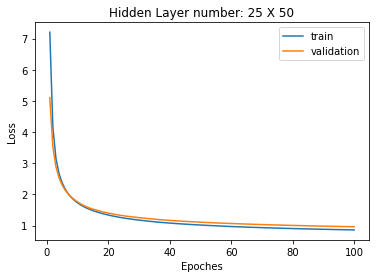

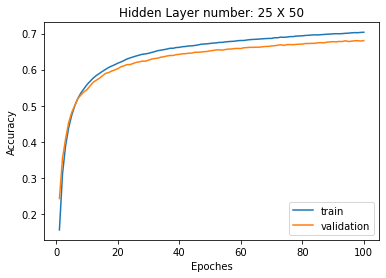

[784, 50, 25, 10]
Epoch 5, Time 5.791536569595337 seconds
Train_loss = 2.1334, Valid_loss = 2.0460, Valid_accuracy = 0.4826
Epoch 10, Time 11.720548629760742 seconds
Train_loss = 1.5516, Valid_loss = 1.5348, Valid_accuracy = 0.5547
Epoch 15, Time 17.70167064666748 seconds
Train_loss = 1.3143, Valid_loss = 1.3182, Valid_accuracy = 0.5903
Epoch 20, Time 23.493807315826416 seconds
Train_loss = 1.1833, Valid_loss = 1.1988, Valid_accuracy = 0.6159
Epoch 25, Time 29.900768756866455 seconds
Train_loss = 1.0990, Valid_loss = 1.1211, Valid_accuracy = 0.6292
Epoch 30, Time 35.7751407623291 seconds
Train_loss = 1.0412, Valid_loss = 1.0667, Valid_accuracy = 0.6429
Epoch 35, Time 41.6165726184845 seconds
Train_loss = 0.9986, Valid_loss = 1.0266, Valid_accuracy = 0.6523
Epoch 40, Time 47.47112727165222 seconds
Train_loss = 0.9645, Valid_loss = 0.9946, Valid_accuracy = 0.6592
Epoch 45, Time 53.37896180152893 seconds
Train_loss = 0.9367, Valid_loss = 0.9688, Valid_accuracy = 0.6641
Epoch 50, Time 59.2

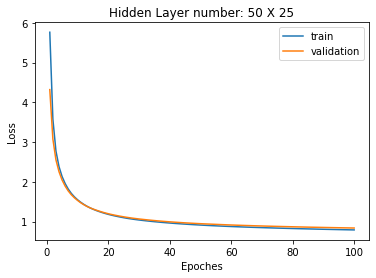

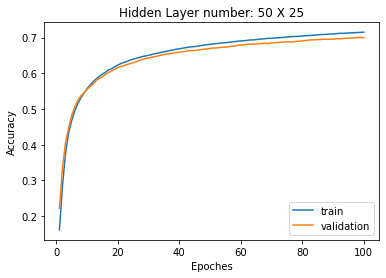

In [7]:
# Layer Specs: 50  100, 100  50, 25  50, and 50  25
Hidden_Layer = [[50, 100], [100, 50], [25, 50], [50, 25]]
config = yaml.load(open('./partc.yaml', 'r'), Loader=yaml.SafeLoader)

for hidden in Hidden_Layer:
    config['layer_specs'][1:3] = hidden
    print(config['layer_specs'])
    model  = Neuralnetwork(config)

    # Load the data
    x_train, y_train = load_data(path="./", mode="train")
    x_test, y_test = load_data(path="./", mode="t10k")

    x_train = normalize_data(x_train)
    # Y_train = one_hot_encoding(labels=Y_train)
    x_test = normalize_data(x_test)
    # y_test = one_hot_encoding(labels=y_test)

    # Create splits for validation data here.
    x_train, y_train, x_valid, y_valid = data_spliter(x_train, y_train, percentage=0.2)
    # train the model
    recording = train(model, x_train, y_train, x_valid, y_valid, config)

    # Recall parameters with minimum validation loss
    model.load_para()

    test_accuracy = test(model, x_test, y_test)

    print('Test_accuracy: {}'.format(test_accuracy))

    # Plots
    plt.figure
    plt.plot(recording['epoches'], recording['train_loss'], label='train')
    plt.plot(recording['epoches'], recording['valid_loss'], label='validation')
    plt.xlabel('Epoches')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Hidden Layer number: {} X {}'.format(hidden[0],hidden[1]))
    plt.show()

    plt.figure
    plt.plot(recording['epoches'], recording['train_accuracy'], label='train')
    plt.plot(recording['epoches'], recording['valid_accuracy'], label='validation')
    plt.xlabel('Epoches')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title('Hidden Layer number: {} X {}'.format(hidden[0],hidden[1]))
    plt.show()




### (ii) Three hidden layers

Epoch 5, Time 6.2522783279418945 seconds
Train_loss = 2.1170, Valid_loss = 2.0994, Valid_accuracy = 0.4636
Epoch 10, Time 12.527162551879883 seconds
Train_loss = 1.5984, Valid_loss = 1.6722, Valid_accuracy = 0.5202
Epoch 15, Time 18.805429458618164 seconds
Train_loss = 1.3925, Valid_loss = 1.4918, Valid_accuracy = 0.5453
Epoch 20, Time 25.08765482902527 seconds
Train_loss = 1.2777, Valid_loss = 1.3866, Valid_accuracy = 0.5629
Epoch 25, Time 31.36196255683899 seconds
Train_loss = 1.2005, Valid_loss = 1.3120, Valid_accuracy = 0.5749
Epoch 30, Time 37.61129117012024 seconds
Train_loss = 1.1449, Valid_loss = 1.2561, Valid_accuracy = 0.5840
Epoch 35, Time 43.83965301513672 seconds
Train_loss = 1.1016, Valid_loss = 1.2163, Valid_accuracy = 0.5907
Epoch 40, Time 50.14187932014465 seconds
Train_loss = 1.0666, Valid_loss = 1.1820, Valid_accuracy = 0.5977
Epoch 45, Time 56.39508318901062 seconds
Train_loss = 1.0382, Valid_loss = 1.1555, Valid_accuracy = 0.6033
Epoch 50, Time 62.642422914505005 s

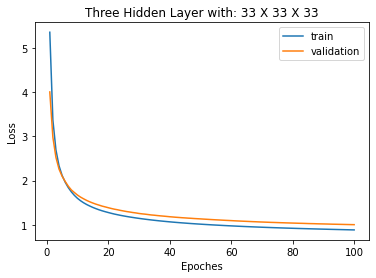

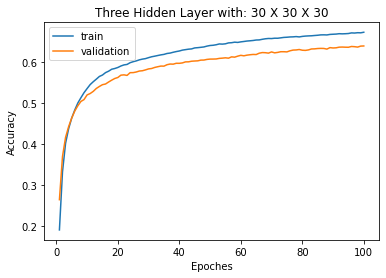

In [8]:

config['layer_specs'] = [784, 33, 33, 33, 10]
model  = Neuralnetwork(config)

# Load the data
x_train, y_train = load_data(path="./", mode="train")
x_test, y_test = load_data(path="./", mode="t10k")

x_train = normalize_data(x_train)
# Y_train = one_hot_encoding(labels=Y_train)
x_test = normalize_data(x_test)
# y_test = one_hot_encoding(labels=y_test)

# Create splits for validation data here.
x_train, y_train, x_valid, y_valid = data_spliter(x_train, y_train, percentage=0.2)
# train the model
recording = train(model, x_train, y_train, x_valid, y_valid, config)

# Recall parameters with minimum validation loss
model.load_para()

test_accuracy = test(model, x_test, y_test)

print('Test_accuracy: {}'.format(test_accuracy))

# Plots
plt.figure
plt.plot(recording['epoches'], recording['train_loss'], label='train')
plt.plot(recording['epoches'], recording['valid_loss'], label='validation')
plt.xlabel('Epoches')
plt.ylabel('Loss')
plt.legend()
plt.title('Three Hidden Layer with: {} X {} X {}'.format(config['layer_specs'][1], config['layer_specs'][2], config['layer_specs'][3]))
plt.show()

plt.figure
plt.plot(recording['epoches'], recording['train_accuracy'], label='train')
plt.plot(recording['epoches'], recording['valid_accuracy'], label='validation')
plt.xlabel('Epoches')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Three Hidden Layer with: 30 X 30 X 30')
plt.show()

### (iii) One hidden layer

Epoch 5, Time 8.077784299850464 seconds
Train_loss = 3.0257, Valid_loss = 3.0325, Valid_accuracy = 0.5493
Epoch 10, Time 16.076446056365967 seconds
Train_loss = 2.2565, Valid_loss = 2.3585, Valid_accuracy = 0.6168
Epoch 15, Time 24.117095708847046 seconds
Train_loss = 1.8992, Valid_loss = 2.0258, Valid_accuracy = 0.6494
Epoch 20, Time 32.25357246398926 seconds
Train_loss = 1.6709, Valid_loss = 1.8130, Valid_accuracy = 0.6705
Epoch 25, Time 40.37852716445923 seconds
Train_loss = 1.5065, Valid_loss = 1.6627, Valid_accuracy = 0.6844
Epoch 30, Time 48.41388916969299 seconds
Train_loss = 1.3796, Valid_loss = 1.5474, Valid_accuracy = 0.6941
Epoch 35, Time 56.37860584259033 seconds
Train_loss = 1.2797, Valid_loss = 1.4569, Valid_accuracy = 0.7009
Epoch 40, Time 64.35530209541321 seconds
Train_loss = 1.1985, Valid_loss = 1.3810, Valid_accuracy = 0.7097
Epoch 45, Time 72.33990788459778 seconds
Train_loss = 1.1294, Valid_loss = 1.3123, Valid_accuracy = 0.7139
Epoch 50, Time 80.29370403289795 sec

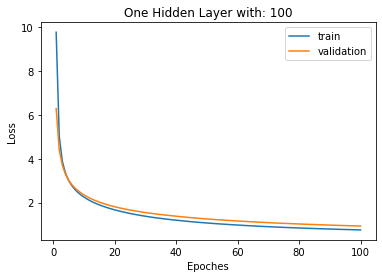

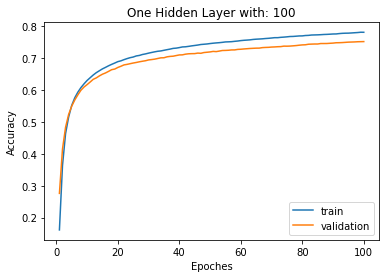

In [9]:
config['layer_specs'] = [784, 100, 10]
model  = Neuralnetwork(config)

# Load the data
x_train, y_train = load_data(path="./", mode="train")
x_test, y_test = load_data(path="./", mode="t10k")

x_train = normalize_data(x_train)
# Y_train = one_hot_encoding(labels=Y_train)
x_test = normalize_data(x_test)
# y_test = one_hot_encoding(labels=y_test)

# Create splits for validation data here.
x_train, y_train, x_valid, y_valid = data_spliter(x_train, y_train, percentage=0.2)
# train the model
recording = train(model, x_train, y_train, x_valid, y_valid, config)

# Recall parameters with minimum validation loss
model.load_para()

test_accuracy = test(model, x_test, y_test)

print('Test_accuracy: {}'.format(test_accuracy))

# Plots
plt.figure
plt.plot(recording['epoches'], recording['train_loss'], label='train')
plt.plot(recording['epoches'], recording['valid_loss'], label='validation')
plt.xlabel('Epoches')
plt.ylabel('Loss')
plt.legend()
plt.title('One Hidden Layer with: 100')
plt.show()

plt.figure
plt.plot(recording['epoches'], recording['train_accuracy'], label='train')
plt.plot(recording['epoches'], recording['valid_accuracy'], label='validation')
plt.xlabel('Epoches')
plt.ylabel('Accuracy')
plt.legend()
plt.title('One Hidden Layer with: 100')
plt.show()

## (d) Experiment with Regularization

In [2]:
# load model para
config_d = yaml.load(open('./partd.yaml', 'r'), Loader=yaml.SafeLoader)

recordings = []

for l2_penalty in [1e-2, 1e-3, 1e-4]:
    config_d['L2_penalty'] = l2_penalty

    # Train the model with cross validation
    max_test_accu = 0

    model_d = Neuralnetwork(config_d)
    recording = train(model_d, x_train, y_train, x_valid, y_valid, config_d)
    recordings.append(recording)

    # Recall parameters with minimum validation loss
    model_d.load_para()
    test_accuracy = test(model_d, x_test, y_test)
    max_test_accu = max(max_test_accu, test_accuracy)
            
    print(f'l2_penalty: {l2_penalty}, max test accuracy: {max_test_accu:.4f}')

Epoch 1, Time 1.5300822257995605 seconds
Train_loss = 182.4539, Valid_loss = 144.6652, Valid_accuracy = 0.2590
Epoch 11, Time 16.817611694335938 seconds
Train_loss = 3.5018, Valid_loss = 2.9977, Valid_accuracy = 0.7582
Epoch 21, Time 31.808597087860107 seconds
Train_loss = 1.0117, Valid_loss = 0.9897, Valid_accuracy = 0.7633
l2_penalty: 0.01, max test accuracy: 0.7573
Epoch 1, Time 1.5720012187957764 seconds
Train_loss = 29.0790, Valid_loss = 25.8032, Valid_accuracy = 0.2333
Epoch 11, Time 16.825955390930176 seconds
Train_loss = 14.8886, Valid_loss = 14.6103, Valid_accuracy = 0.6133
Epoch 21, Time 32.10977339744568 seconds
Train_loss = 9.8069, Valid_loss = 9.6377, Valid_accuracy = 0.6780
Epoch 31, Time 47.43628120422363 seconds
Train_loss = 6.5999, Valid_loss = 6.4996, Valid_accuracy = 0.7168
Epoch 41, Time 62.50486707687378 seconds
Train_loss = 4.5192, Valid_loss = 4.4569, Valid_accuracy = 0.7487
Epoch 51, Time 77.74566888809204 seconds
Train_loss = 3.1553, Valid_loss = 3.1134, Valid_

## (e) Experiment with Activations.

In [ ]:
# load model para
config_e = yaml.load(open('./parte.yaml', 'r'), Loader=yaml.SafeLoader)

recordings_e = []

for activation in ['sigmoid', 'tanh', 'ReLU', 'leakyReLU']:
    config_e['activation'] = activation

    # Train the model with cross validation
    max_test_accu = 0

    model_e = Neuralnetwork(config_e)
    recording = train(model_e, x_train, y_train, x_valid, y_valid, config_e)
    recordings_e.append(recording)

    # Recall parameters with minimum validation loss
    model_e.load_para()
    test_accuracy = test(model_e, x_test, y_test)
    max_test_accu = max(max_test_accu, test_accuracy)
            
    print(f'activation: {activation}, max test accuracy: {max_test_accu:.4f}')